In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
tf.random.set_seed(42)

In [3]:
df=pd.read_excel("/content/Obesity_Dataset.xlsx")

In [4]:
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

<Axes: >

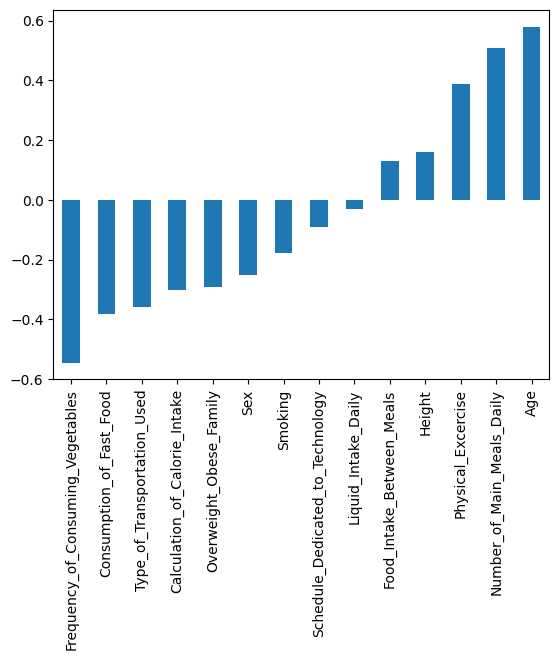

In [6]:
df.corr()['Class'][:-1].sort_values(ascending=True).plot(kind='bar')

<Axes: xlabel='Sex', ylabel='Class'>

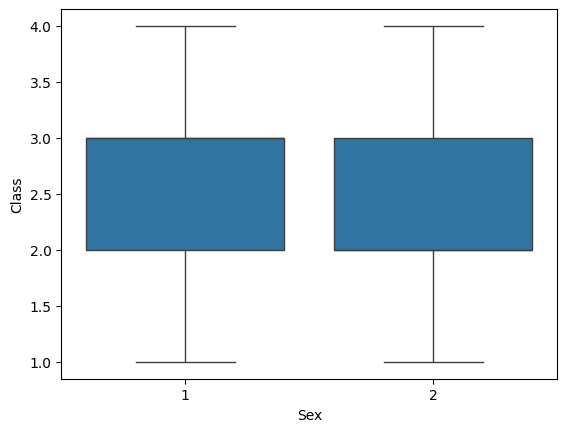

In [7]:
sns.boxplot(x='Sex',y = 'Class',data= df)

<Axes: xlabel='Schedule_Dedicated_to_Technology', ylabel='Class'>

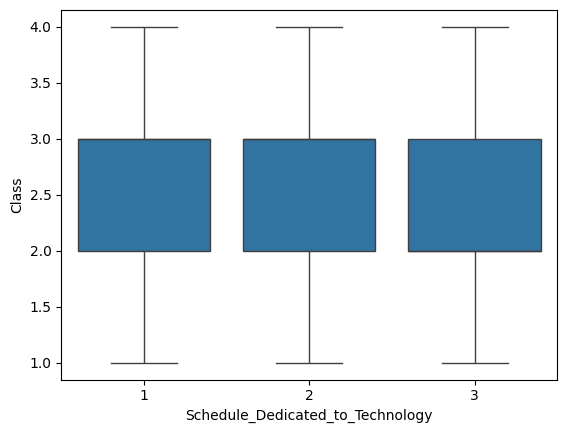

In [8]:
sns.boxplot(x='Schedule_Dedicated_to_Technology',y = 'Class',data= df)

<Axes: xlabel='Liquid_Intake_Daily', ylabel='Class'>

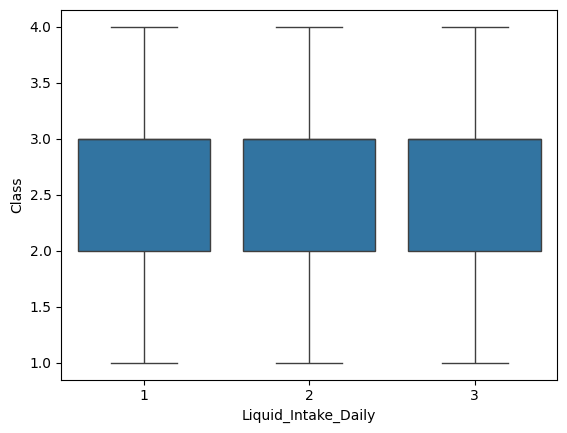

In [9]:
sns.boxplot(x='Liquid_Intake_Daily',y = 'Class',data= df)

<Axes: xlabel='Food_Intake_Between_Meals', ylabel='Class'>

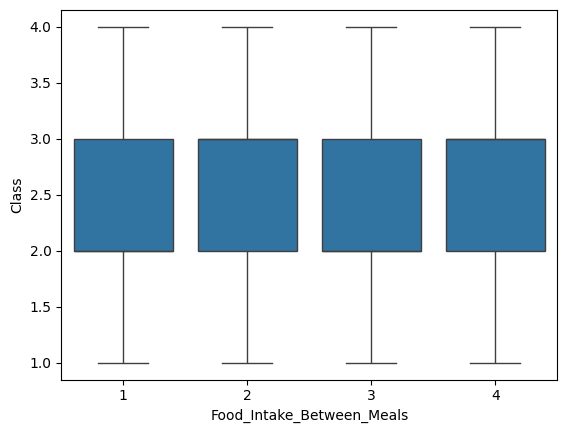

In [10]:
sns.boxplot(x='Food_Intake_Between_Meals',y = 'Class',data= df)

In [11]:
df.drop(['Sex','Schedule_Dedicated_to_Technology','Liquid_Intake_Daily','Food_Intake_Between_Meals'], axis=1, inplace=True)

<Axes: xlabel='Age', ylabel='Class'>

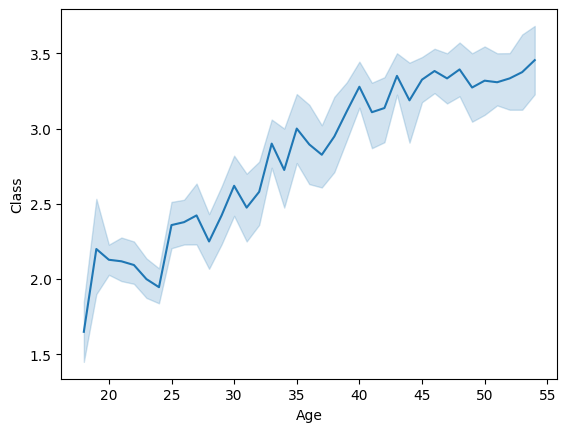

In [12]:
sns.lineplot(x= 'Age', y='Class', data=df)

In [13]:
def Age_divide(x):
    if x<=20:return 0
    elif x>20 and x <= 25: return 1
    elif x>25 and x <= 30: return 2
    elif x>30 and x <= 35: return 3
    elif x>35 and x <= 40: return 4
    elif x>40 and x <= 45: return 5
    elif x>45 and x <= 50: return 6
    elif x>50: return 7

df['Age_quantile'] = df['Age'].apply(Age_divide)
df['Age_quantile'] =df['Age_quantile'].astype(int)

<Axes: xlabel='Age_quantile', ylabel='Class'>

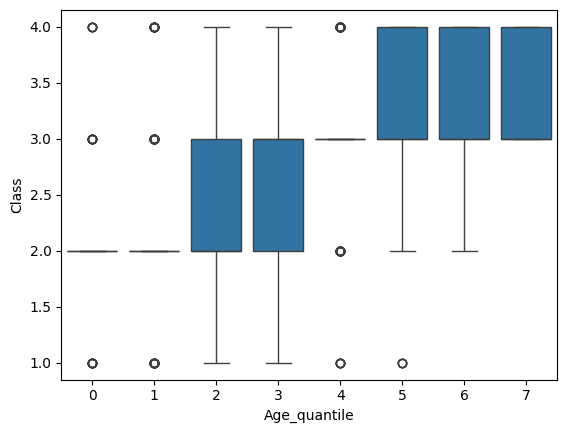

In [14]:
sns.boxplot(x='Age_quantile', y='Class', data=df )

<Axes: >

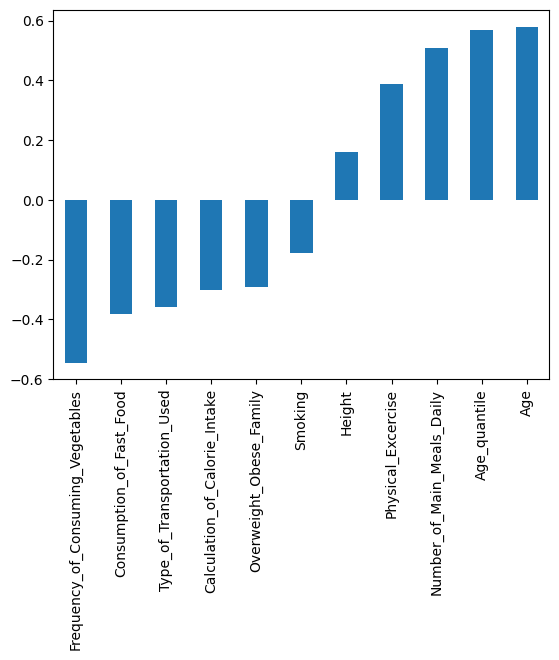

In [15]:
df_cor = df.corr()['Class'].sort_values(ascending=True)
df_cor[:-1].plot(kind='bar')

In [16]:
df.drop(['Age'],axis=1,inplace=True)

In [17]:
df['Class'].unique()

array([2, 3, 4, 1])

In [18]:
df['Class'] = df['Class'] -1

In [19]:
df['Class'].unique()

array([1, 2, 3, 0])

In [20]:
X = df.drop(['Class'], axis=1)
y =df['Class']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=33, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

In [23]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,340 (48.20 KB)

 Trainable params: 12,340 (48.20 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [26]:
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [27]:
es_callback = EarlyStopping(monitor='val_accuracy', mode='max',patience=120,restore_best_weights=True)

In [28]:
trainer = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=1000,
    batch_size=8,
    callbacks=[es_callback]
)

Epoch 1/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5156 - loss: 1.1450 - val_accuracy: 0.6925 - val_loss: 0.7279
Epoch 2/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 0.7156 - val_accuracy: 0.7236 - val_loss: 0.6443
Epoch 3/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7455 - loss: 0.6201 - val_accuracy: 0.7267 - val_loss: 0.6223
Epoch 4/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7585 - loss: 0.5761 - val_accuracy: 0.7267 - val_loss: 0.6124
Epoch 5/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7827 - loss: 0.5428 - val_accuracy: 0.7422 - val_loss: 0.6062
Epoch 6/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8011 - loss: 0.5160 - val_accuracy: 0.7484 - val_loss: 0.5969
Epoch 7/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4921 - val_accuracy: 0.7547 - val_loss: 0.5867
Epoch 8/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8217 - loss: 0.4616 - 

In [29]:
y_pred = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [30]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [31]:
from sklearn.metrics import classification_report,accuracy_score, f1_score

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.93      0.92      0.92       132
           2       0.85      0.89      0.87       118
           3       0.90      0.82      0.86        57

    accuracy                           0.89       322
   macro avg       0.85      0.86      0.85       322
weighted avg       0.89      0.89      0.89       322



In [32]:
print("Accuracy is: ", round(accuracy_score(y_test, y_pred_classes),2)*100,"%")

Accuracy is:  89.0 %


In [33]:
print("F1-Score is: ", round(f1_score(y_test, y_pred_classes,average='weighted'),2)*100,"%")

F1-Score is:  89.0 %
